<a href="https://colab.research.google.com/github/bernimof/TD_CsdeDatos/blob/M3_Analisis_de_Caso_Data_Wrangling/Ana%CC%81lisisdeCaso3_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de Caso - Data Wrangling**

Fuente: Comtrade-CL

In [ ]:
# Cargar Bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import missingno as msno

## **1. Carga y exploración de datos:**

- Importación del dataset Comtrade-CL en formato CSV en un DataFrame.

In [ ]:
df = pd.read_csv('Comtrade-CL.csv')

- Inspección de los datos con .head(), .info() y .describe().

In [ ]:
df.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2016,2016,2016,5,0,0,X,152,Chile,...,0,-1,NaN,0,NaN,NaN,40628,NaN,40628.0,0
1,H4,2016,2016,2016,5,0,0,X,152,Chile,...,0,-1,NaN,0,NaN,NaN,2477029,NaN,2477029.0,0
2,H4,2016,2016,2016,5,0,0,X,152,Chile,...,0,-1,NaN,0,NaN,NaN,312134,NaN,312134.0,0
3,H4,2016,2016,2016,5,0,0,X,152,Chile,...,0,-1,NaN,0,NaN,NaN,415588,NaN,415588.0,0
4,H4,2016,2016,2016,5,0,0,X,152,Chile,...,0,-1,NaN,0,NaN,NaN,1713566,NaN,1713566.0,0


In [ ]:
df.tail()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
1454,H5,2019,2019,2019,5,0,0,M,152,Chile,...,0,-1,NaN,0,0.0,0.0,387817,387817.70,3.721996e+05,4
1455,H5,2019,2019,2019,5,0,0,M,152,Chile,...,0,-1,NaN,0,0.0,0.0,15730839,15730839.55,1.437500e+07,4
1456,H5,2019,2019,2019,5,0,0,M,152,Chile,...,0,-1,NaN,0,0.0,0.0,4859351,4859351.44,4.432919e+06,4
1457,H5,2019,2019,2019,5,0,0,M,152,Chile,...,0,-1,NaN,0,0.0,0.0,430940,430940.20,4.223388e+05,0
1458,H5,2019,2019,2019,5,0,0,M,152,Chile,...,0,-1,NaN,0,0.0,0.0,641854,641854.77,5.812157e+05,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Classification          1459 non-null   object 
 1   Year                    1459 non-null   int64  
 2   Period                  1459 non-null   int64  
 3   Period Desc.            1459 non-null   int64  
 4   Aggregate Level         1459 non-null   int64  
 5   Is Leaf Code            1459 non-null   int64  
 6   Trade Flow Code         1459 non-null   int64  
 7   Trade Flow              1459 non-null   object 
 8   Reporter Code           1459 non-null   int64  
 9   Reporter                1459 non-null   object 
 10  Reporter ISO            1459 non-null   object 
 11  Partner Code            1459 non-null   int64  
 12  Partner                 1459 non-null   object 
 13  Partner ISO             1459 non-null   object 
 14  2nd Partner Code        1459 non-null   

In [ ]:
# Usaremos solo algunas Columnas aparentemente relevantes
columnas = ['Year', 'Partner Code', 'Partner', 'Trade Value (US$)','CIF Trade Value (US$)','FOB Trade Value (US$)']
df = pd.read_csv('Comtrade-CL.csv', usecols=columnas)
df.head()

,Year,Partner Code,Partner,Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$)
0,2016,8,Albania,40628,NaN,40628.0
1,2016,24,Angola,2477029,NaN,2477029.0
2,2016,60,Bermuda,312134,NaN,312134.0
3,2016,70,Bosnia Herzegovina,415588,NaN,415588.0
4,2016,84,Belize,1713566,NaN,1713566.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1459 non-null   int64  
 1   Partner Code           1459 non-null   int64  
 2   Partner                1459 non-null   object 
 3   Trade Value (US$)      1459 non-null   int64  
 4   CIF Trade Value (US$)  737 non-null    float64
 5   FOB Trade Value (US$)  1270 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.5+ KB


In [ ]:
df.describe() # solo sobre columnas númericas.

,Year,Partner Code,Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$)
count,1459.000000,1459.000000,1.459000e+03,7.370000e+02,1.270000e+03
mean,2017.496916,422.939685,7.440156e+08,7.262806e+08,7.200327e+08
std,1.115650,254.839537,5.288741e+09,5.161881e+09,5.118608e+09
min,2016.000000,0.000000,4.800000e+01,4.821000e+01,1.000000e+00
25%,2017.000000,204.000000,1.893495e+05,3.707879e+04,2.254748e+05
50%,2017.000000,418.000000,3.275594e+06,1.988453e+06,3.295855e+06
75%,2018.000000,642.000000,8.783050e+07,8.721625e+07,8.561977e+07
max,2019.000000,899.000000,7.548171e+10,7.418732e+10,7.548171e+10


Más adelante cambiaremos columna de 'Año' y 'Partner Code', ya que no es necesario hacer cálculos númericos sobre estas columnas. Si no, más de tipo categórico (apesar que que son valores númericos).

- Identifica valores nulos y duplicados.

In [ ]:
# Verificar Valores Nulos
print("\nConteo de valores nulos:")
df.isnull().sum()


Conteo de valores nulos:


,0
Year,0
Partner Code,0
Partner,0
Trade Value (US$),0
CIF Trade Value (US$),722
FOB Trade Value (US$),189


In [ ]:
# Verificar Valores Duplicados
print(df.duplicated().sum())

2


## **2. Limpieza y transformación de datos:**

- Imputa valores nulos utilizando estrategias adecuadas (media,
mediana o moda).
- Elimina registros duplicados.
- Convierte columnas categóricas en variables numéricas si es
necesario.

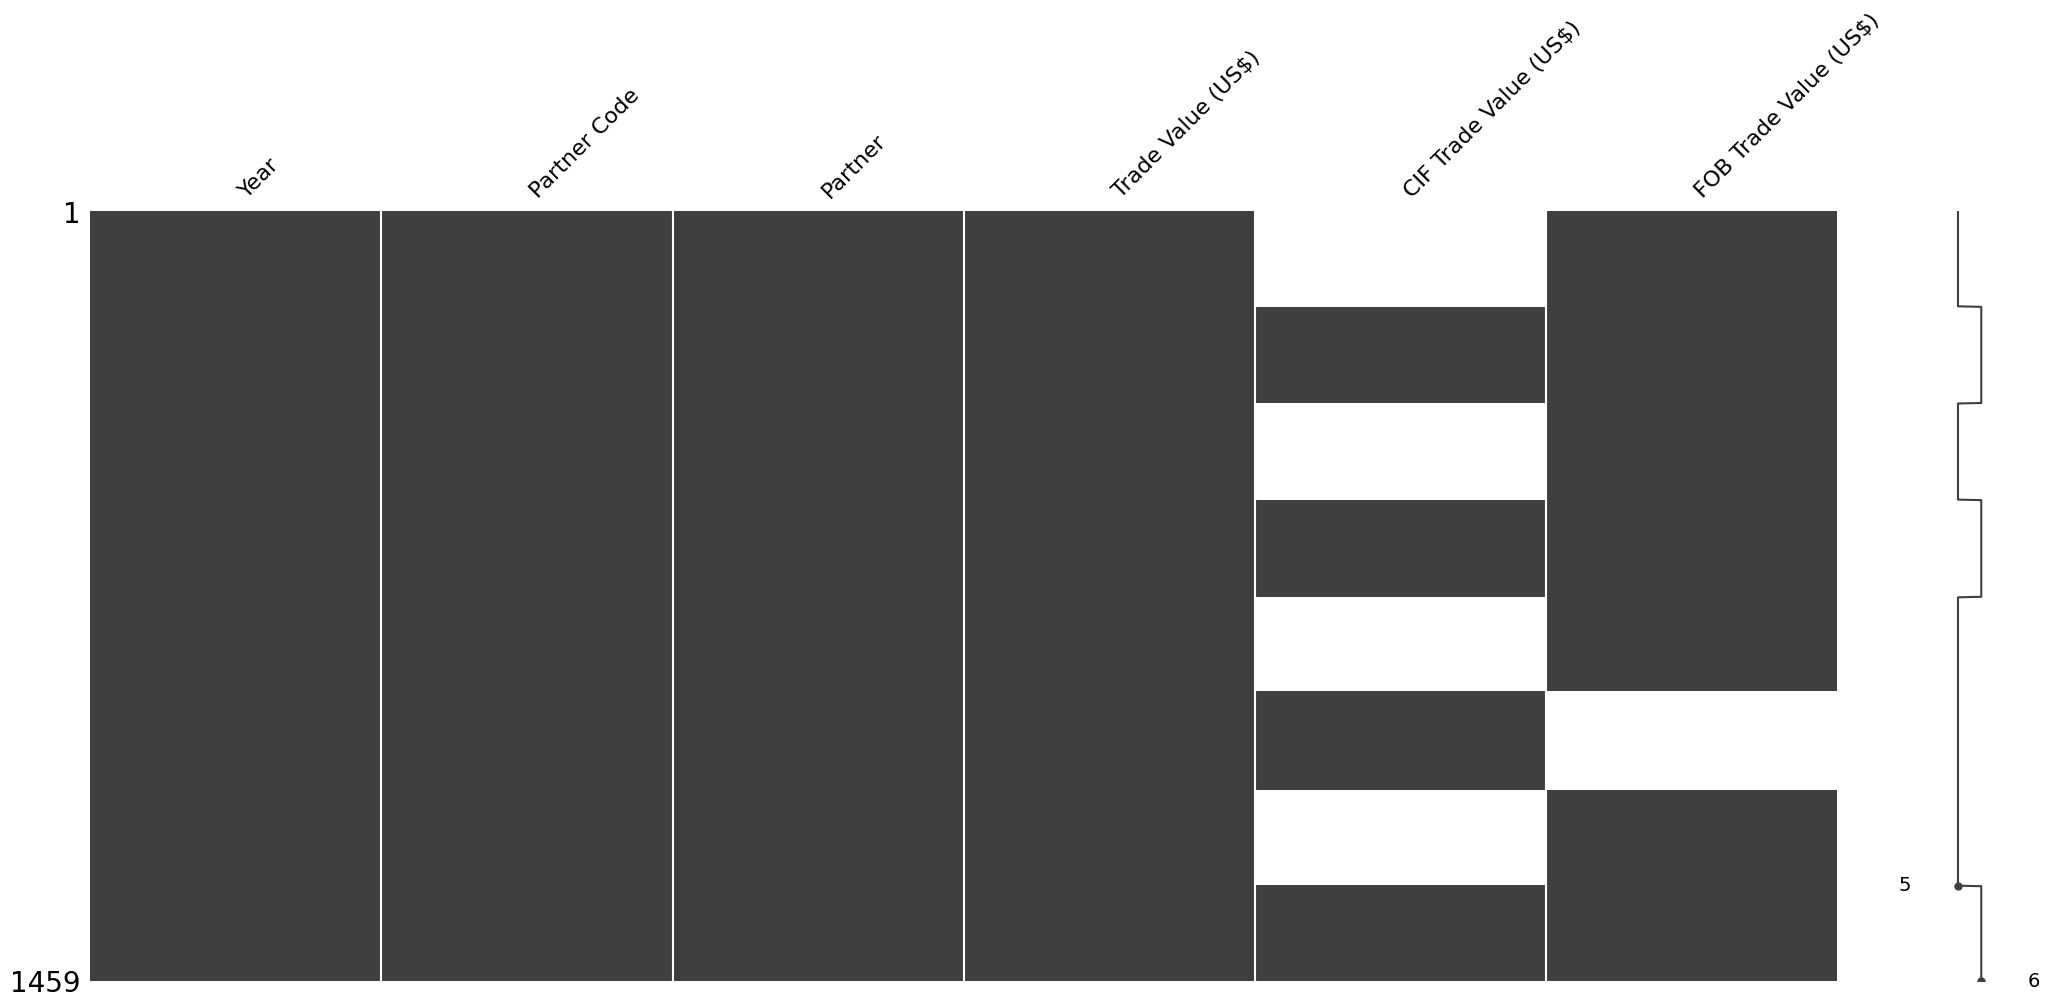

In [ ]:
# Visualización de Valores Nulos
msno.matrix(df)
plt.show()

No se cuenta con el significado de los datos, digase que implica Trade Value (USD), CIF Trade Value (USD) y FOB Trade Value (USD).

En un contexto general de logística, CIF (Costo, Seguro y Flete) y FOB (Libre a Bordo) determinan la responsabilidad en el transporte marítimo. CIF implica que el vendedor paga flete y seguro hasta el puerto de destino, mientras que en FOB el vendedor solo entrega la carga a bordo y el comprador asume costos y riesgos desde el origen. Por lo que, para el vendedor siempre es mayor el valor CIF que el FOB.

In [ ]:
# Columna 'FOB Trade Value (US$)' tiene 189 valores nulos de 1459
print("Porcentaje de Valores Pérdidos en 'FOB Trade Value (US$)': ",round((189/1459)*100,2),"%")

Porcentaje de Valores Pérdidos en 'FOB Trade Value (US$)':  12.95 %


Respecto al valor FOB, dado al significado de este y que solo faltan 12,95% de los datos, creo que no corresponde imputar valores pérdidos.

Solo por prácticar imputación se copiaran los valores de CIF a los FOB faltantes. Dada la naturaleza de los datos, no corresponde una media o mediana.

In [ ]:
# Imputar los valores de 'CIF Trade Value (US$)' en 'FOB Trade Value (US$)' donde 'FOB Trade Value (US$)' esté vacío (NaN)
df['FOB Trade Value (US$)'] = df['FOB Trade Value (US$)'].fillna(df['CIF Trade Value (US$)'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1459 non-null   int64  
 1   Partner Code           1459 non-null   int64  
 2   Partner                1459 non-null   object 
 3   Trade Value (US$)      1459 non-null   int64  
 4   CIF Trade Value (US$)  737 non-null    float64
 5   FOB Trade Value (US$)  1459 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.5+ KB


Ahora, queremos saber si 'Trade Value (USD)'  es el mismo valor que 'CIF Trade Value (USD)', ya que al ver los últimos valores de la tabla original, vi un patrón similar.

In [ ]:
# Cálculo de % de valores pérdidos
# Columna 'CIF Trade Value (US$)' tiene 722 valores nulos de 1459
print("Porcentaje de Valores Pérdidos en 'CIF Trade Value (US$)': ",round((722/1459)*100,2),"%")

Porcentaje de Valores Pérdidos en 'CIF Trade Value (US$)':  49.49 %


In [ ]:
# Generamos una copia para no afectar el DF original
df1 = df.copy()

## Se van a comparar los valores de las columnas 'Trade Value (US$)' y 'CIF Trade Value (US$)'

# Llenar los valores nulos con 0 (paso necesario para cambiar el tipo de dato de CIF de float a int)
df1['CIF Trade Value (US$)'] = df1['CIF Trade Value (US$)'].fillna(0)

# Convertir a Entero, como están en 'Trade Value (US$)'
df1['CIF Trade Value (US$)'] = df1['CIF Trade Value (US$)'].astype(int)

# Comparar las columnas y contar los valores iguales
igualdad = (df1['Trade Value (US$)'] == df1['CIF Trade Value (US$)']).sum()

print(f'Cantidad de valores iguales: {igualdad}')

Cantidad de valores iguales: 737


Por lo tanto, 'CIF' tiene un 49,49% de sus datos pérdidos y todos los 737 datos que si tenemos de 'CIF' son los mismos que aparecen en 'Trade Value'. No creo que se deba imputar por algún método cuantitativo, como lo pide el ejercicio. Es mejor eliminar la columna de 'CIF' para no tener repetida la mism información en 'Trade Value' y 'CIF'.

In [ ]:
df = df.drop(columns=['CIF Trade Value (US$)'])
df.head()

,Year,Partner Code,Partner,Trade Value (US$),FOB Trade Value (US$)
0,2016,8,Albania,40628,40628.0
1,2016,24,Angola,2477029,2477029.0
2,2016,60,Bermuda,312134,312134.0
3,2016,70,Bosnia Herzegovina,415588,415588.0
4,2016,84,Belize,1713566,1713566.0


In [ ]:
# Elimina las filas duplicadas
df = df.drop_duplicates()

# Verifica si quedan valores duplicados
print(df.duplicated().sum())

0


In [ ]:
df.dtypes

,0
Year,int64
Partner Code,int64
Partner,object
Trade Value (US$),int64
FOB Trade Value (US$),float64


In [ ]:
# Cambio de tipo de dato de columna 'Año' y 'Partner Code'
## ya que no es necesario hacer cálculos sobre estas columnas
df['Year'] = df['Year'].astype(str)
df['Partner Code'] = df['Partner Code'].astype(str)
df.dtypes

,0
Year,object
Partner Code,object
Partner,object
Trade Value (US$),int64
FOB Trade Value (US$),float64


## **3. Optimización y estructuración de datos:**

- Aplica funciones de groupby y agregación.
- Filtra los datos para obtener subconjuntos de interés.
- Renombra y reorganiza columnas para mejorar la interpretación.

In [ ]:
# Agrupar por 'Year' y obtener múltiples estadísticas de 'Trade Value (US$)'
df.groupby('Year').agg({'Trade Value (US$)': ['sum','min', 'max', 'mean']})

Trade Value (US$)                               
                   sum min          max          mean
Year                                                 
2016      238987078629  53  60732633015  6.565579e+08
2017      268581976744  53  69229257332  7.318310e+08
2018      299354788182  55  75481713821  8.179093e+08
2019      278561820245  48  69681396828  7.737828e+08

In [ ]:
# Agrupar por 'Partner' y obtener múltiples estadísticas de 'Trade Value (US$)'
df.groupby('Partner').agg({'Trade Value (US$)': ['count', 'sum', 'mean']})

Trade Value (US$)                            
                        count           sum          mean
Partner                                                  
Afghanistan                 5        533539  1.067078e+05
Albania                     6       3581512  5.969187e+05
Algeria                     8      45696119  5.712015e+06
Andorra                     8       3745058  4.681322e+05
Angola                      8     234799618  2.934995e+07
...                       ...           ...           ...
Viet Nam                    8    4213719101  5.267149e+08
World                      10  542759404779  5.427594e+10
Yemen                       1         11610  1.161000e+04
Zambia                      8       3636777  4.545971e+05
Zimbabwe                    4       1311544  3.278860e+05

[209 rows x 3 columns]

In [ ]:
# Filtrar los Partner que tienen más de X registros
# Contar cuántas veces aparece cada 'Partner' en el DataFrame
contarpartner = df.groupby('Partner').size()

# Filtrar los 'Partner' que tienen más de X registros
x = 8
partnersconmasX = contarpartner[contarpartner > x]

# Filtrar el DataFrame original para solo mostrar esos 'Partner' con más de X registros
df_filtrado = df[df['Partner'].isin(partnersconmasX.index)]

# Ver el DataFrame filtrado
df_filtrado.head()

,Year,Partner Code,Partner,Trade Value (US$),FOB Trade Value (US$)
44,2016,0,World,60732633015,6.073263e+10
198,2016,0,World,58760906357,5.527241e+10
423,2017,0,World,69229257332,6.922926e+10
573,2017,0,World,65061731101,6.130695e+10
777,2018,0,World,75481713821,7.548171e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1457 non-null   object 
 1   Partner Code           1457 non-null   object 
 2   Partner                1457 non-null   object 
 3   Trade Value (US$)      1457 non-null   int64  
 4   FOB Trade Value (US$)  1457 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 68.3+ KB


In [ ]:
# Renombrar columnas para hacerlas más claras
df2 = df.rename(columns={
    'Year': 'Año',
    'Partner Code': 'Código País',
    'Partner': 'País',
    'Trade Value (US$)': 'Valor Comercial (USD)',
    'FOB Trade Value (US$)': 'Valor FOB (USD)'
})

# Reorganizar las columnas para mejorar la interpretación
df2 = df2[['Código País', 'País', 'Año', 'Valor Comercial (USD)', 'Valor FOB (USD)']]

# Establecer 'Código País' como índice
df2 = df2.set_index('Código País')

# Mostrar Nuevo DF
df2

,País,Año,Valor Comercial (USD),Valor FOB (USD)
Código País,,,,
8,Albania,2016,40628,4.062800e+04
24,Angola,2016,2477029,2.477029e+06
60,Bermuda,2016,312134,3.121340e+05
70,Bosnia Herzegovina,2016,415588,4.155880e+05
84,Belize,2016,1713566,1.713566e+06
...,...,...,...,...
398,Kazakhstan,2019,387817,3.721996e+05
191,Croatia,2019,15730839,1.437500e+07
862,Venezuela,2019,4859351,4.432919e+06


In [ ]:
# Eliminar la columna 'Valor FOB (USD)'
df2 = df2.drop(columns=['Valor FOB (USD)'])

# DataFrame actualizado
df2.head()

,País,Año,Valor Comercial (USD)
Código País,,,
8,Albania,2016,40628
24,Angola,2016,2477029
60,Bermuda,2016,312134
70,Bosnia Herzegovina,2016,415588
84,Belize,2016,1713566


## **4. Exportación de datos:**

- Guarda el DataFrame procesado en un archivo CSV sin incluir el
índice.
- Exporta los datos limpios a Excel para su visualización y reporte.

In [ ]:
df2.to_excel('Comtrade-CL-BOF.xlsx', index=False)
df2.to_csv('Comtrade-CL-BOF.csv', index=False)